In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df1 = pd.read_csv('xbtusdt_orderbook1.csv', index_col=0)
df2 = pd.read_csv('xbtusdt_orderbook2.csv', index_col=0)
df3 = pd.read_csv('xbtusdt_orderbook3.csv', index_col=0)
df4 = pd.read_csv('xbtusdt_orderbook4.csv', index_col=0)
df5 = pd.read_csv('xbtusdt_orderbook5.csv', index_col=0)
df6 = pd.read_csv('xbtusdt_orderbook6.csv', index_col=0)

In [4]:
import numpy as np

def feature(df):
    for i in range(10):
        ind = str(i)
        df['spreed_'+ind] = df['ask_p_'+ind] - df['bid_p_'+ind]
        df['mid_p_'+ind] = (df['ask_p_'+ind] + df['bid_p_'+ind]) / 2

    for i in range(9):
        ind = str(i+1)
        df['ask_p_diff_'+ind+'_0'] = df['ask_p_'+ind] - df['ask_p_0']
        df['bid_p_diff_'+ind+'_0'] = df['bid_p_'+ind] - df['bid_p_0']
        ind1 = str(i)
        df['ask_p_diff_'+ind+'_'+ind1] = df['ask_p_'+ind] - df['ask_p_'+ind1]
        df['bid_p_diff_'+ind+'_'+ind1] = df['bid_p_'+ind] - df['bid_p_'+ind1]

    l1, l2, l3, l4 = [], [], [], []
    for i in range(10):
        ind = str(i)
        l1.append('ask_p_'+ind)
        l2.append('bid_p_'+ind)
        l3.append('ask_vol_'+ind)
        l4.append('bid_vol_'+ind)
    df['ask_p_mean'] = df[l1].mean(axis=1)
    df['bid_p_mean'] = df[l2].mean(axis=1)
    df['ask_vol_mean'] = df[l3].mean(axis=1)
    df['bid_vol_mean'] = df[l4].mean(axis=1)

    l = []
    template = 'spreed_{0}'
    for i in range(10):
        l.append(template.format(i))
    df['accum_spreed'] = df[l].sum(axis=1)

    for i in range(10):
        ind = str(i)
        df['spreed_vol_'+ind] = df['ask_vol_'+ind] - df['bid_vol_'+ind]
        df['vol_rate_'+ind] = df['ask_vol_'+ind] / df['bid_vol_'+ind]
        df['sask_vol_rate_'+ind] = df['spreed_vol_'+ind] / df['ask_vol_'+ind]
        df['sbid_vol_rate_'+ind] = df['spreed_vol_'+ind] / df['bid_vol_'+ind]
        df['ask_vol_rate_'+ind] = df['ask_vol_'+ind] / (df['bid_vol_'+ind] + df['ask_vol_'+ind])
        df['bid_vol_rate_'+ind] = df['bid_vol_'+ind] / (df['bid_vol_'+ind] + df['ask_vol_'+ind])

    l = []
    template = 'spreed_vol_{0}'
    for i in range(10):
        l.append(template.format(i))
    df['accum_spreed_vol'] = df[l].sum(axis=1)

    for i in range(2, 10):
        ind = str(i)
        df['ask_p_roll_'+ind+'_mean'] = df['ask_p_0'].rolling(i).mean()
        df['ask_v_roll_'+ind+'_mean'] = df['ask_vol_0'].rolling(i).mean()
        df['bid_p_roll_'+ind+'_mean'] = df['bid_p_0'].rolling(i).mean()
        df['bid_v_roll_'+ind+'_mean'] = df['bid_vol_0'].rolling(i).mean()
        
        df['ask_p_roll_'+ind+'_std'] = df['ask_p_0'].rolling(i).std()
        df['ask_v_roll_'+ind+'_std'] = df['ask_vol_0'].rolling(i).std()
        df['bid_p_roll_'+ind+'_std'] = df['bid_p_0'].rolling(i).std()
        df['bid_v_roll_'+ind+'_std'] = df['bid_vol_0'].rolling(i).std()
        
        df['ask_p_roll_'+ind+'_var'] = df['ask_p_0'].rolling(i).var()
        df['ask_v_roll_'+ind+'_var'] = df['ask_vol_0'].rolling(i).var()
        df['bid_p_roll_'+ind+'_var'] = df['bid_p_0'].rolling(i).var()
        df['bid_v_roll_'+ind+'_var'] = df['bid_vol_0'].rolling(i).var()
        
        df['ask_p_roll_'+ind+'_skew'] = df['ask_p_0'].rolling(i).skew()
        df['ask_v_roll_'+ind+'_skew'] = df['ask_vol_0'].rolling(i).skew()
        df['bid_p_roll_'+ind+'_skew'] = df['bid_p_0'].rolling(i).skew()
        df['bid_v_roll_'+ind+'_skew'] = df['bid_vol_0'].rolling(i).skew()
        
        df['ask_p_roll_'+ind+'_kurt'] = df['ask_p_0'].rolling(i).kurt()
        df['ask_v_roll_'+ind+'_kurt'] = df['ask_vol_0'].rolling(i).kurt()
        df['bid_p_roll_'+ind+'_kurt'] = df['bid_p_0'].rolling(i).kurt()
        df['bid_v_roll_'+ind+'_kurt'] = df['bid_vol_0'].rolling(i).kurt()
    
    shift_df = df['mid_p_0'].shift(2)
    df['y'] = np.where(df['mid_p_0'] > shift_df, 1, 0)
    df['y'] = np.where(df['mid_p_0'] < shift_df, -1, df['y'])
    return df

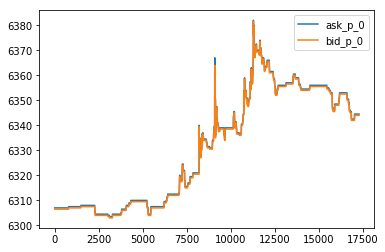

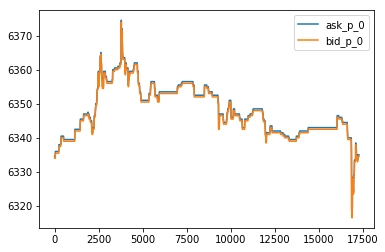

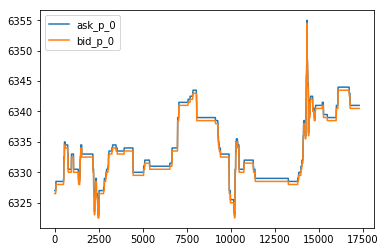

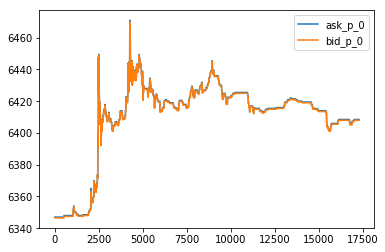

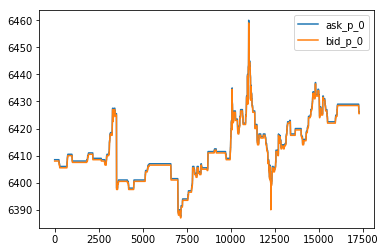

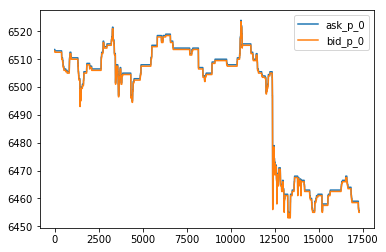

In [29]:
df1[['ask_p_0', 'bid_p_0']].plot()
df2[['ask_p_0', 'bid_p_0']].plot()
df3[['ask_p_0', 'bid_p_0']].plot()
df4[['ask_p_0', 'bid_p_0']].plot()
df5[['ask_p_0', 'bid_p_0']].plot()
df6[['ask_p_0', 'bid_p_0']].plot()

In [5]:
df1 = feature(df1)
df2 = feature(df2)
df3 = feature(df3)
df4 = feature(df4)
df5 = feature(df5)
df6 = feature(df6)

In [21]:
df1['y'].value_counts()

 0    16505
 1      392
-1      386
Name: y, dtype: int64

In [22]:
df2['y'].value_counts()

 0    16625
 1      335
-1      320
Name: y, dtype: int64

In [23]:
df3['y'].value_counts()

 0    16815
 1      252
-1      213
Name: y, dtype: int64

In [24]:
df4['y'].value_counts()

 0    15809
 1      775
-1      696
Name: y, dtype: int64

In [25]:
df5['y'].value_counts()

 0    16264
 1      552
-1      464
Name: y, dtype: int64

In [26]:
df6['y'].value_counts()

 0    16338
-1      502
 1      440
Name: y, dtype: int64

In [6]:
df = pd.concat([df1, df2, df3, df4, df5])
df.describe()

,ask_p_0,ask_p_1,ask_p_2,ask_p_3,ask_p_4,ask_p_5,ask_p_6,ask_p_7,ask_p_8,ask_p_9,...,bid_v_roll_9_var,ask_p_roll_9_skew,ask_v_roll_9_skew,bid_p_roll_9_skew,bid_v_roll_9_skew,ask_p_roll_9_kurt,ask_v_roll_9_kurt,bid_p_roll_9_kurt,bid_v_roll_9_kurt,y
count,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,86403.000000,...,8.636300e+04,11082.000000,86363.000000,11081.000000,86363.000000,11082.000000,86363.000000,11081.000000,86363.000000,86403.000000
mean,6367.137837,6367.638300,6368.138601,6368.638838,6369.138936,6369.638994,6370.139081,6370.639127,6371.139278,6371.639307,...,2.272987e+11,0.009733,-0.002137,0.009084,0.017978,209.993821,1.358603,1871.688092,1.966868,0.002627
std,40.042824,40.043187,40.043499,40.043716,40.043834,40.043888,40.043931,40.043981,40.044228,40.044266,...,1.394807e+12,1.575048,1.202043,1.574259,1.196774,3158.446652,116.898518,6041.150418,435.065066,0.225265
min,6303.500000,6304.000000,6304.500000,6305.000000,6305.500000,6306.000000,6306.500000,6307.000000,6307.500000,6308.000000,...,5.860079e+03,-3.039188,-2.999959,-3.039285,-2.999995,-24780.594507,-698.799939,-26480.297447,-612.629753,-1.000000
25%,6336.500000,6337.000000,6337.500000,6338.000000,6338.500000,6339.000000,6339.500000,6340.000000,6340.500000,6341.000000,...,2.712660e+09,-0.862739,-0.769806,-0.862730,-0.750054,-58.008224,-1.604161,-2.797278,-1.593156,0.000000
50%,6352.500000,6353.000000,6353.500000,6354.000000,6354.500000,6355.000000,6355.500000,6356.000000,6356.500000,6357.000000,...,1.175478e+10,-0.000245,0.002426,-0.000246,0.024055,0.673487,-0.427849,32.399187,-0.423410,0.000000
75%,6409.000000,6409.500000,6410.000000,6410.500000,6411.000000,6411.500000,6412.000000,6412.500000,6413.000000,6413.500000,...,4.893717e+10,0.861210,0.768179,0.863140,0.782616,279.609786,1.146684,1177.765433,1.151763,0.000000
max,6471.000000,6471.500000,6472.000000,6472.500000,6473.000000,6473.500000,6474.000000,6474.500000,6475.000000,6475.500000,...,4.980394e+13,3.038421,2.999976,3.038421,2.999998,20490.650629,18840.692797,41703.429430,127784.941740,1.000000


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.33, random_state=42)


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional     scklearn functions

import matplotlib.pyplot as plt

ind_params = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 0.8,
              'objective': 'multi:softmax', 'min_child_weight': 3, 'max_depth': 7,
             'subsample': 0.9, 'learning_rate': 0.1}

# clf = XGBClassifier(learning_rate =0.01, n_estimators=2000, max_depth=6,
#  min_child_weight=1, max_delta_step = 5, gamma=0, subsample=0.85, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, reg_alpha= 0.01)
clf = XGBClassifier(**ind_params)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.000605	validation_1-merror:0.001368
[1]	validation_0-merror:0.000449	validation_1-merror:0.001192
[2]	validation_0-merror:0.000345	validation_1-merror:0.001122
[3]	validation_0-merror:0.000294	validation_1-merror:0.001122
[4]	validation_0-merror:0.000225	validation_1-merror:0.001228
[5]	validation_0-merror:0.000259	validation_1-merror:0.001228
[6]	validation_0-merror:0.000259	validation_1-merror:0.001157
[7]	validation_0-merror:0.000259	validation_1-merror:0.001157
[8]	validation_0-merror:0.000259	validation_1-merror:0.001122
[9]	validation_0-merror:0.000207	validation_1-merror:0.001087
[10]	validation_0-merror:0.000207	validation_1-merror:0.001017
[11]	validation_0-merror:0.000173	validation_1-merror:0.001052
[12]	validation_0-merror:0.000155	validation_1-merror:0.001017
[13]	validation_0-merror:0.000138	validation_1-merror:0.001017
[14]	validation_0-merror:0.000138	validation_1-merror:0.001017
[15]	validation_0-merror:0.000121	validation_1-merror:0.000982
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.9)

In [9]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
X_test['predict'] = y_pred

In [10]:
def feature_importance(df, clf):
    columns = [x for x in df.columns.tolist() if x != 'y']
    t = zip(columns, clf.feature_importances_.tolist())
    nonzero_feature_cnt = 0
    fi = sorted(t, key=lambda tup: tup[1], reverse=True)
    for i in fi:
        print(i)
        if i[1] > 0:
            nonzero_feature_cnt += 1
    print("non zero feature cnt: {0}, feature total cnt:{1}".format(nonzero_feature_cnt, len(clf.feature_importances_)))
    return fi

In [11]:
feature_importance(df, clf)

('bid_p_roll_3_skew', 0.05313301458954811)
('ask_p_roll_4_skew', 0.033711981028318405)
('ask_p_roll_3_skew', 0.030414070934057236)
('ask_p_roll_3_std', 0.02968120202422142)
('ask_p_roll_9_skew', 0.024551117792725563)
('bid_p_roll_9_skew', 0.023085379973053932)
('ask_p_roll_7_skew', 0.020886771380901337)
('bid_p_roll_6_skew', 0.019054599106311798)
('ask_p_roll_8_skew', 0.01868816465139389)
('ask_p_roll_6_skew', 0.018321730196475983)
('spreed_vol_0', 0.01722242496907711)
('bid_p_roll_4_skew', 0.01722242496907711)
('bid_p_roll_3_std', 0.016855990514159203)
('bid_p_roll_5_skew', 0.016855990514159203)
('ask_v_roll_6_mean', 0.016855990514159203)
('ask_v_roll_9_mean', 0.016855990514159203)
('bid_v_roll_4_mean', 0.016123121604323387)
('bid_v_roll_5_mean', 0.016123121604323387)
('ask_v_roll_5_mean', 0.015023818239569664)
('ask_v_roll_8_mean', 0.015023818239569664)
('bid_p_roll_5_kurt', 0.014657383784651756)
('bid_v_roll_7_mean', 0.014657383784651756)
('bid_v_roll_9_mean', 0.014290949329733849)


[('bid_p_roll_3_skew', 0.05313301458954811),
 ('ask_p_roll_4_skew', 0.033711981028318405),
 ('ask_p_roll_3_skew', 0.030414070934057236),
 ('ask_p_roll_3_std', 0.02968120202422142),
 ('ask_p_roll_9_skew', 0.024551117792725563),
 ('bid_p_roll_9_skew', 0.023085379973053932),
 ('ask_p_roll_7_skew', 0.020886771380901337),
 ('bid_p_roll_6_skew', 0.019054599106311798),
 ('ask_p_roll_8_skew', 0.01868816465139389),
 ('ask_p_roll_6_skew', 0.018321730196475983),
 ('spreed_vol_0', 0.01722242496907711),
 ('bid_p_roll_4_skew', 0.01722242496907711),
 ('bid_p_roll_3_std', 0.016855990514159203),
 ('bid_p_roll_5_skew', 0.016855990514159203),
 ('ask_v_roll_6_mean', 0.016855990514159203),
 ('ask_v_roll_9_mean', 0.016855990514159203),
 ('bid_v_roll_4_mean', 0.016123121604323387),
 ('bid_v_roll_5_mean', 0.016123121604323387),
 ('ask_v_roll_5_mean', 0.015023818239569664),
 ('ask_v_roll_8_mean', 0.015023818239569664),
 ('bid_p_roll_5_kurt', 0.014657383784651756),
 ('bid_v_roll_7_mean', 0.014657383784651756),


In [12]:
f1_score(y_test, y_pred, average='macro')

0.9914984806565309

In [13]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       681
           0       1.00      1.00      1.00     27096
           1       0.98      0.99      0.99       736

   micro avg       1.00      1.00      1.00     28513
   macro avg       0.99      0.99      0.99     28513
weighted avg       1.00      1.00      1.00     28513



/Users/magiclane/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=DeprecationWarning)


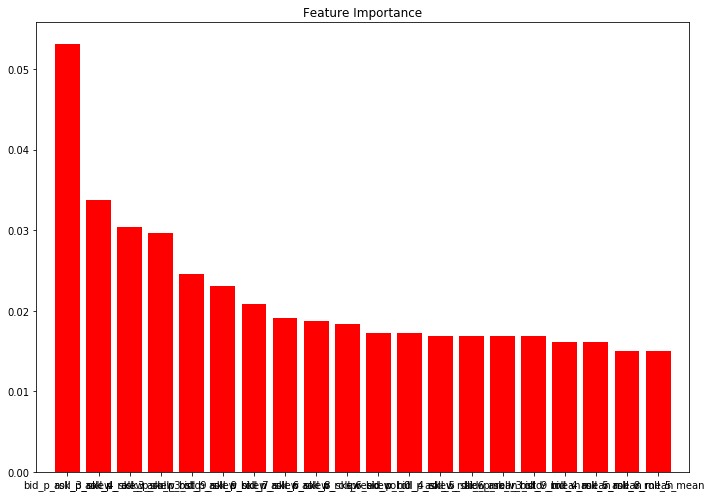

In [14]:
from matplotlib import pyplot
import scikitplot as skplt

skplt.plotters.plot_feature_importances(clf, feature_names=df.columns, figsize=(11.7, 8.27))
plt.show()

In [15]:
X = df.drop(['y'], axis=1)
y = df['y']
predict = clf.predict(X)
report = metrics.classification_report(y, predict)
print(report)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      2079
           0       1.00      1.00      1.00     82018
           1       0.99      1.00      1.00      2306

   micro avg       1.00      1.00      1.00     86403
   macro avg       1.00      1.00      1.00     86403
weighted avg       1.00      1.00      1.00     86403



In [16]:
fee = 1-0.00075
def profit_long(df, amount=1000):
    long, short = None, None
    xbt = None
    profit = 0
    for index, row in df.iterrows():
        descision = row['predict']
        best_bid = row['bid_p_0']
        best_ask = row['ask_p_0']
        if descision == 1:
            if long is None:
                long = best_bid
                xbt = amount / long
                print('long, price: {0}, vol: {1}, index: {2}'.format(long, row['bid_vol_0'], index))
                continue
        elif descision == -1:
            if long is not None:
                tmp = xbt * best_ask
                profit += (tmp - amount)
                amount = tmp
                print('sell long, price: {0}, vol: {1}, index: {2}, profit: {3}'.format(best_ask, row['ask_vol_0'], index, profit))
                long = None
                continue
        if long is not None and best_ask < long:
            tmp = xbt * best_bid * fee
            profit += (tmp - amount)
            amount = tmp
            print('stop loss, sell long: price-{0}, vol-{1}, profit: {2}'.format(best_bid, row['bid_vol_0'], profit))
            long = None
        
    print("net return: {0}, rate: {1}".format(profit, profit/amount))
    
def profit_short(df, amount=1000):
    short = None
    xbt = None
    profit = 0
    for index, row in df.iterrows():
        descision = row['predict']
        best_bid = row['bid_p_0']
        best_ask = row['ask_p_0']
        if descision == 1:
            if short is not None:
                tmp = xbt * best_ask * fee
                profit += (amount - tmp)
                amount = tmp
                print('sell short: price-{0}, vol-{1}, profit: {2}'.format(best_ask, row['ask_vol_0'], profit))
                short = None
                continue
        elif descision == -1:
            if short is None:
                short = best_bid
                xbt = amount / short * fee
                print('short: price-{0}, vol-{1}'.format(short, row['bid_vol_0']))
                continue
        if short is not None and best_bid > short:
            tmp = xbt * best_ask
            profit += (amount - tmp)
            amount = tmp
            print('stop loss, sell short: price-{0}, vol-{1}, profit: {2}'.format(best_ask, row['ask_vol_0'], profit))
            short = None
    print("net return: {0}, rate: {1}".format(profit, profit/amount))

In [17]:
X1 = df5.drop(['y'], axis=1)
y1 = df5['y']
predict1 = clf.predict(X1)
report1 = metrics.classification_report(y1, predict1)
print(report1)

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       464
           0       1.00      1.00      1.00     16264
           1       0.99      0.99      0.99       552

   micro avg       1.00      1.00      1.00     17280
   macro avg       1.00      1.00      1.00     17280
weighted avg       1.00      1.00      1.00     17280



In [18]:
X1['predict'] = predict1

In [19]:
profit_long(X1, 500)

long, price: 6407.0, vol: 1302829.0, index: 698
sell long, price: 6410.0, vol: 1895701.0, index: 979, profit: 0.23411893241762982
long, price: 6408.0, vol: 1689460.0, index: 1822
sell long, price: 6409.0, vol: 2528682.0, index: 2162, profit: 0.3121829334995141
long, price: 6408.0, vol: 11235701.0, index: 2926
sell long, price: 6418.0, vol: 1946218.0, index: 3225, profit: 1.0929447670412173
long, price: 6418.5, vol: 149570.0, index: 3262
sell long, price: 6427.0, vol: 606284.0, index: 3295, profit: 1.7565406275257374
long, price: 6424.0, vol: 797817.0, index: 3303
sell long, price: 6427.0, vol: 1664877.0, index: 3417, profit: 1.9908603071463062
long, price: 6425.0, vol: 2141602.0, index: 3439
sell long, price: 6398.0, vol: 889580.0, index: 3509, profit: -0.11867326924169674
long, price: 6398.0, vol: 7779872.0, index: 3572
sell long, price: 6400.5, vol: 2423881.0, index: 4125, profit: 0.076653913757184
long, price: 6398.0, vol: 2591361.0, index: 4485
sell long, price: 6406.5, vol: 236054

In [20]:
profit_short(X1, 500)

short: price-6407.5, vol-49469.0
sell short: price-6407.5, vol-180333.0, profit: 0.7497187499999995
short: price-6409.5, vol-239742.0
sell short: price-6408.5, vol-127458.0, profit: 1.5760887842122315
short: price-6408.5, vol-253079.0
sell short: price-6408.5, vol-458846.0, profit: 2.3234442875859145
short: price-6417.5, vol-191141.0
sell short: price-6419.0, vol-121021.0, profit: 2.953528733022665
short: price-6426.5, vol-81239.0
sell short: price-6424.5, vol-1060112.0, profit: 3.853273431894195
short: price-6426.5, vol-82141.0
sell short: price-6425.5, vol-424008.0, profit: 4.674301934048231
short: price-6397.5, vol-3536542.0
sell short: price-6398.5, vol-64526.0, profit: 5.339703069798929
short: price-6400.0, vol-597617.0
sell short: price-6398.5, vol-17872.0, profit: 6.1971774370736625
short: price-6406.0, vol-95809.0
sell short: price-6389.0, vol-34661.0, profit: 8.246074205547814
short: price-6389.0, vol-67690.0
sell short: price-6388.0, vol-830637.0, profit: 9.060281913790561
sh

In [77]:
1000/0.02/7

7142.857142857143

In [22]:
from sklearn.externals import joblib
joblib.dump(clf, 'order_book_flow_11_6.joblib')

['order_book_flow_11_6.joblib']

In [38]:
clf1 = joblib.load('order_book_flow.joblib')

In [39]:
clf1.predict(X.head(1))

array([0])

In [25]:
from sklearn2pmml import PMMLPipeline
from xgboost.sklearn import XGBClassifier

paydayloan_pipeline = PMMLPipeline([
    ("classifier", XGBClassifier(**ind_params, nthread=-1))
])
paydayloan_pipeline.fit(df.drop(['y'], axis=1), df["y"])

PMMLPipeline(steps=[('classifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=40, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.9))])

In [26]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(paydayloan_pipeline, "order_flow_prediction_11_10.pmml", with_repr = True)